In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense ,Dropout
from tensorflow.keras import layers

import datetime
import math

In [153]:
df = pd.read_excel('MaruteruOriginalDatainCM.xlsx')

In [154]:
df.head()

,Year,SMW,MaxT,MinT,RH1,RH2,RF,WS,SSH,EVPcm
0,1994,1,27.2,18.6,90.0,69.0,1.5,2.6,6.8,1.91
1,1994,2,27.3,19.1,91.0,69.0,0.2,2.6,6.4,1.99
2,1994,3,27.9,19.3,92.0,68.0,0.1,1.9,7.2,1.84
3,1994,4,28.0,19.3,92.0,70.0,0.0,2.0,6.7,1.71
4,1994,5,28.7,19.3,93.0,68.0,0.9,1.8,7.2,2.00


In [155]:
df.head()

,Year,SMW,MaxT,MinT,RH1,RH2,RF,WS,SSH,EVPcm
0,1994,1,27.2,18.6,90.0,69.0,1.5,2.6,6.8,1.91
1,1994,2,27.3,19.1,91.0,69.0,0.2,2.6,6.4,1.99
2,1994,3,27.9,19.3,92.0,68.0,0.1,1.9,7.2,1.84
3,1994,4,28.0,19.3,92.0,70.0,0.0,2.0,6.7,1.71
4,1994,5,28.7,19.3,93.0,68.0,0.9,1.8,7.2,2.00


In [156]:
df = df.rename(columns={"Year": "year", 'MaxT':'MAX','MinT':'MIN', 'RH1': 'RHI', 'RH2':'RHII', 'EVPcm':'EVAP'})

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    884 non-null    int64  
 1   SMW     884 non-null    int64  
 2   MAX     884 non-null    float64
 3   MIN     884 non-null    float64
 4   RHI     884 non-null    float64
 5   RHII    884 non-null    float64
 6   RF      884 non-null    float64
 7   WS      884 non-null    float64
 8   SSH     884 non-null    float64
 9   EVAP    884 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 69.2 KB


In [158]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,884.0,2002.000000,4.901753,1994.00,1998.000,2002.00,2006.000,2010.0
SMW,884.0,26.500000,15.016827,1.00,13.750,26.50,39.250,52.0
MAX,884.0,30.880430,2.896401,23.70,28.900,30.60,32.325,42.7
MIN,884.0,22.518100,2.903825,15.00,20.275,23.00,24.700,30.2
RHI,884.0,88.998529,4.756143,9.30,87.100,89.60,91.700,97.7
RHII,884.0,67.209615,10.973660,27.70,60.850,67.30,74.450,95.1
RF,884.0,17.618439,36.940888,0.00,0.000,0.00,17.775,332.0
WS,884.0,3.904525,2.417673,1.20,2.100,3.00,5.100,13.2
SSH,884.0,6.031674,2.347045,0.00,4.300,6.40,7.900,13.9
EVAP,884.0,3.359276,1.175747,1.67,2.500,3.07,4.000,8.6


In [159]:
df.isnull().sum()

year    0
SMW     0
MAX     0
MIN     0
RHI     0
RHII    0
RF      0
WS      0
SSH     0
EVAP    0
dtype: int64

In [160]:
sns.set_theme(style="ticks", color_codes=True)

In [161]:
#Drop Emp_Title as it is not required
df = df.drop(["SSH","SMW"], axis=1)

In [162]:
gby_df = df.groupby(['year'],as_index=False).mean()

In [163]:
gby_df

,year,MAX,MIN,RHI,RHII,RF,WS,EVAP
0,1994,30.828846,22.600000,88.942308,67.211538,26.663462,3.005769,2.611346
1,1995,31.325000,21.636538,88.492308,67.211538,28.750000,3.005769,2.614231
2,1996,30.951923,21.726923,89.563462,67.211538,33.653846,3.005769,2.614231
3,1997,31.051923,21.540385,89.978846,67.211538,22.463462,3.005769,2.614231
4,1998,31.515385,22.438462,89.700000,77.194231,0.000000,4.901923,2.655577
5,1999,31.019231,21.794231,89.467308,69.096154,0.000000,4.901923,3.509615
6,2000,30.915385,21.775000,88.505769,69.817308,0.000000,4.913462,3.728846
7,2001,31.244231,21.969231,87.721154,66.911538,0.000000,5.001923,3.573077
8,2002,31.507692,22.019231,87.730769,64.171154,9.107692,5.136538,3.842308
9,2003,30.501923,22.800000,90.361538,72.865385,18.280769,5.221154,3.540385


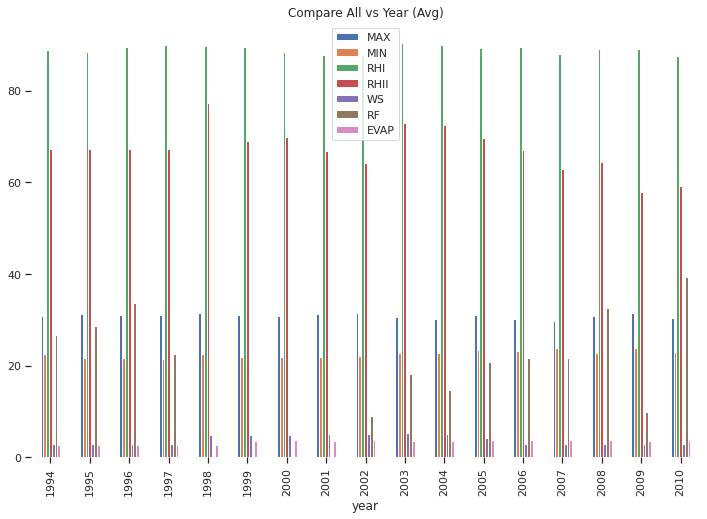

In [164]:
gby_df.plot(x="year", y=['MAX', 'MIN', 'RHI', 'RHII', 'WS', 'RF',
       'EVAP'], kind="bar", title="Compare All vs Year (Avg)", figsize=(12,8))
plt.box(False)

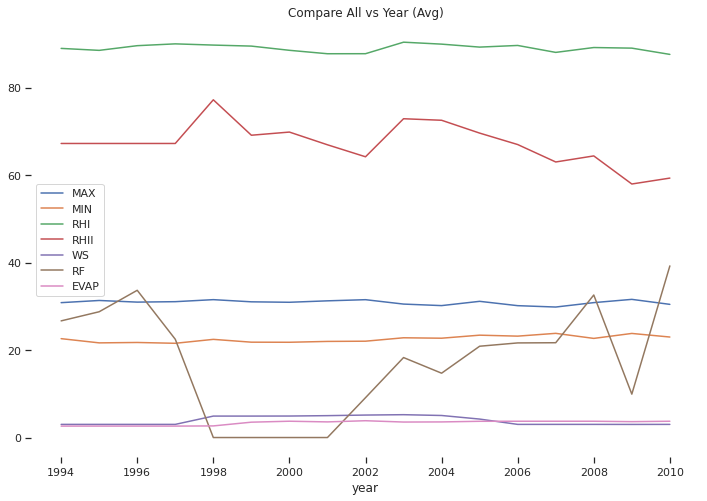

In [165]:
gby_df.plot(x="year", y=['MAX', 'MIN', 'RHI', 'RHII', 'WS', 'RF',
       'EVAP'], kind="line", title="Compare All vs Year (Avg)", figsize=(12,8))
plt.box(False)

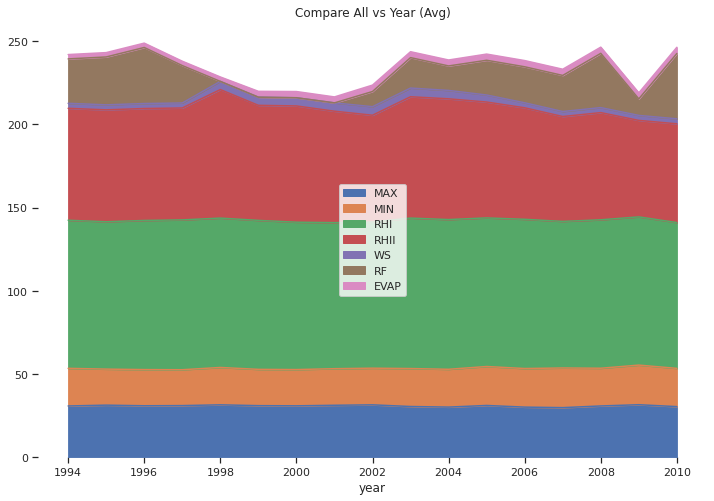

In [166]:
gby_df.plot(x="year", y=['MAX', 'MIN', 'RHI', 'RHII', 'WS', 'RF',
       'EVAP'], kind="area", title="Compare All vs Year (Avg)", figsize=(12,8))
plt.box(False)

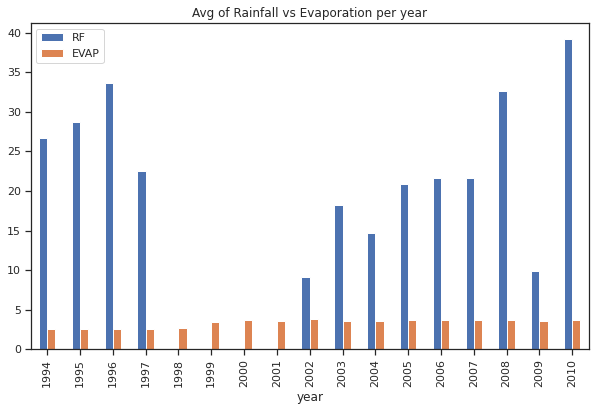

In [167]:
gby_df.plot(x="year", y=["RF", "EVAP"], kind="bar", title="Avg of Rainfall vs Evaporation per year", figsize=(10,6))
plt.box(True)

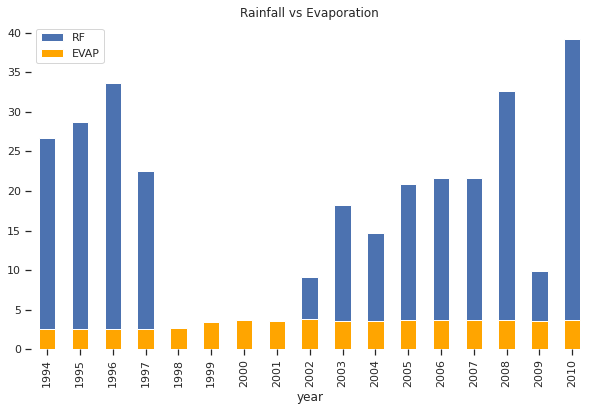

In [168]:
ax = gby_df.plot(x="year", y=["RF"], kind="bar")
gby_df.plot(ax=ax, x="year", y=["EVAP"], kind="bar", color="orange", title="Rainfall vs Evaporation", figsize=(10,6))
plt.box(False)

Text(0.5, 0.98, 'Rainfall vs Year')

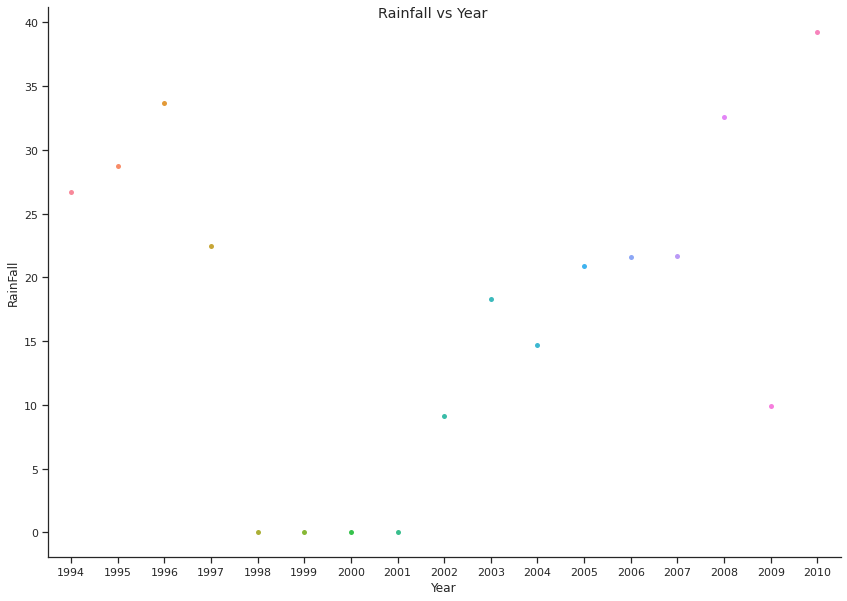

In [169]:
s = sns.catplot(x="year", y="RF", kind="swarm", data=gby_df, height=8.27, aspect=11.7/8.27)
s.set_xlabels("Year")
s.set_ylabels("RainFall")
s.fig.suptitle('Rainfall vs Year')

Text(0.5, 0.98, 'Rainfall vs Year')

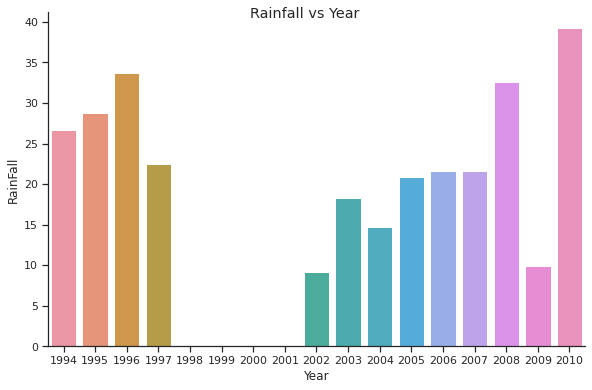

In [170]:
s = sns.catplot(x="year", y="RF", kind="bar", data=gby_df, height=5.27, aspect=9.7/6.27)
s.set_xlabels("Year")
s.set_ylabels("RainFall")
s.fig.suptitle('Rainfall vs Year')

In [171]:
#Drop year as it is not required
df = df.drop(["year"], axis=1)

In [172]:
df.head()

,MAX,MIN,RHI,RHII,RF,WS,EVAP
0,27.2,18.6,90.0,69.0,1.5,2.6,1.91
1,27.3,19.1,91.0,69.0,0.2,2.6,1.99
2,27.9,19.3,92.0,68.0,0.1,1.9,1.84
3,28.0,19.3,92.0,70.0,0.0,2.0,1.71
4,28.7,19.3,93.0,68.0,0.9,1.8,2.00


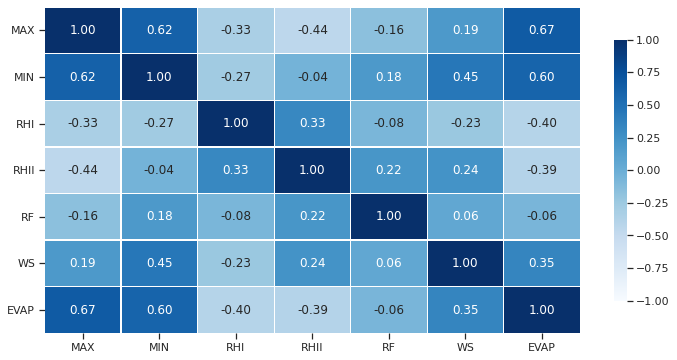

In [173]:
# correlation heat map
plt.figure(figsize=(12, 6))
df_corr = df.corr()

# min -1 and max +1 as we are plotting correlation
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f", vmin= -1.0, vmax=1.0,
           linewidth=0.3, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [174]:
df = df.drop("RHII", axis=1)
df.columns

Index(['MAX', 'MIN', 'RHI', 'RF', 'WS', 'EVAP'], dtype='object')

In [175]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,MAX,MIN,RHI,RF,WS,EVAP
0,27.2,18.6,90.0,1.5,2.6,1.91
1,27.3,19.1,91.0,0.2,2.6,1.99
2,27.9,19.3,92.0,0.1,1.9,1.84
3,28.0,19.3,92.0,0.0,2.0,1.71
4,28.7,19.3,93.0,0.9,1.8,2.00
...,...,...,...,...,...,...
879,30.3,20.3,88.6,0.0,4.2,2.80
880,26.1,20.1,89.0,107.0,3.0,2.80
881,27.3,20.1,88.1,0.0,2.9,2.60
882,27.3,16.2,83.1,0.0,2.1,2.50


In [176]:
X = df.drop('EVAP', axis=1).values
y = df['EVAP'].values

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [178]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
X_train.shape

(707, 5)

In [180]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [181]:
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, Input
from tensorflow.keras import Model

In [182]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(5,))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='layer1_output')(first_dense)
    second_dense = Dense(units='128',activation='relu')(first_dense)
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1',name='layer2_output')(second_dense)
    # Define the model with the input layer 
    # and a list of output layers
    model = Model(inputs=input_layer,outputs=[y1_output, y2_output])
    return model

In [183]:
model = build_model()
model.compile(loss="mean_squared_error", optimizer='adam')

In [184]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 128)          768         input_5[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 128)          16512       dense_8[0][0]                    
__________________________________________________________________________________________________
layer1_output (Dense)           (None, 1)            129         dense_8[0][0]                    
____________________________________________________________________________________________

In [185]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=5, callbacks=[early_stop])

Epoch 1/100
142/142 [==============================] - 1s 4ms/step - loss: 13.2657 - layer1_output_loss: 8.8043 - layer2_output_loss: 4.4615 - val_loss: 1.7159 - val_layer1_output_loss: 0.9368 - val_layer2_output_loss: 0.7792
Epoch 2/100
142/142 [==============================] - 0s 2ms/step - loss: 1.4550 - layer1_output_loss: 0.7730 - layer2_output_loss: 0.6820 - val_loss: 1.5282 - val_layer1_output_loss: 0.8366 - val_layer2_output_loss: 0.6916
Epoch 3/100
142/142 [==============================] - 0s 2ms/step - loss: 1.5634 - layer1_output_loss: 0.8265 - layer2_output_loss: 0.7369 - val_loss: 1.3797 - val_layer1_output_loss: 0.7798 - val_layer2_output_loss: 0.5999
Epoch 4/100
142/142 [==============================] - 0s 3ms/step - loss: 1.4281 - layer1_output_loss: 0.7492 - layer2_output_loss: 0.6789 - val_loss: 1.3464 - val_layer1_output_loss: 0.7611 - val_layer2_output_loss: 0.5853
Epoch 5/100
142/142 [==============================] - 0s 3ms/step - loss: 1.6035 - layer1_output_l

In [186]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

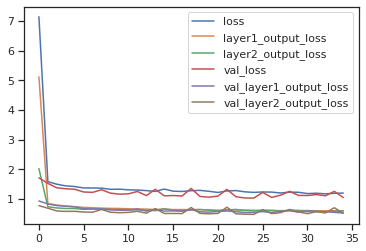

In [187]:
losses.plot()

In [188]:
test_predictions = model.predict(X_test)

In [189]:
test_predictions

[array([[3.2580554],
        [2.5672255],
        [3.4331713],
        [2.6262562],
        [3.0311067],
        [4.4375486],
        [3.9646945],
        [3.6091206],
        [2.9573581],
        [2.6054194],
        [3.7560208],
        [3.1845777],
        [3.5383053],
        [3.5573072],
        [2.8529568],
        [2.6153862],
        [2.5372481],
        [3.8077652],
        [3.2665873],
        [2.8049643],
        [4.0175147],
        [2.9932845],
        [4.7834373],
        [3.2880557],
        [4.794537 ],
        [3.965436 ],
        [2.457615 ],
        [3.660725 ],
        [3.6631486],
        [4.981956 ],
        [5.390386 ],
        [2.4928508],
        [2.698521 ],
        [2.8097138],
        [2.486649 ],
        [4.154403 ],
        [3.1168678],
        [2.8297665],
        [3.284661 ],
        [2.469094 ],
        [3.3731668],
        [3.4010847],
        [2.7985783],
        [3.4179478],
        [2.7290733],
        [2.632876 ],
        [4.1258264],
        [3.55

In [190]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [191]:
pred_df

,Test Y
0,3.32
1,2.80
2,3.70
3,2.22
4,1.97
...,...
172,2.40
173,3.40
174,2.90
175,3.40


In [192]:
test_predictions = pd.Series(test_predictions[0].reshape(177,))

In [193]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [194]:
pred_df.columns = ['Test Y','Model Predictions']

In [195]:
pred_df

,Test Y,Model Predictions
0,3.32,3.258055
1,2.80,2.567225
2,3.70,3.433171
3,2.22,2.626256
4,1.97,3.031107
...,...,...
172,2.40,2.270540
173,3.40,3.178966
174,2.90,3.129266
175,3.40,3.803915


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

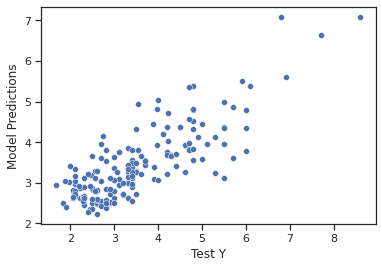

In [196]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [197]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

/home/rishab/anaconda3/envs/iotedge/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

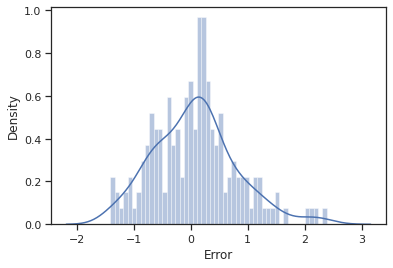

In [198]:
sns.distplot(pred_df['Error'],bins=50)

# Mean Absolute Error

In [199]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

0.5607747456178827

# Mean Squared Error

In [200]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

0.528942210290022

# Predicting on brand new data

In [218]:
new_data = [[29.2,12.2,67.6,5.7,6.0]]

In [219]:
# Don't forget to scale!
scaler.transform(new_data)

array([[ 0.28947368, -0.18421053,  0.65950226,  0.01716867,  0.4       ]])

In [220]:
new_data = scaler.transform(new_data)

In [221]:
model.predict(new_data)

[array([[2.672325]], dtype=float32), array([[3.1013856]], dtype=float32)]

In [205]:
# saving the model by serializing it using json (same thing can be done using YAML)
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

## Saving Scaler

In [212]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

## Using saved scaler and model to predict the results

### Loading Saved Sacler

In [223]:
savedscaler = joblib.load("model/scaler.save") 

### Loading Saved Model

In [227]:
from tensorflow.keras.models import model_from_json
json_file = open("model/model.json","r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model/model.h5")

In [228]:
new_data = [[29.2,12.2,67.6,5.7,6.0]]

In [229]:
new_data = savedscaler.transform(new_data)

In [230]:
loaded_model.predict(new_data)

[array([[2.672325]], dtype=float32), array([[3.1013856]], dtype=float32)]